In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [4]:
train_df = pd.read_csv("/kaggle/input/walmart-sales-forecast/train.csv", parse_dates=['Date'])
features_df = pd.read_csv("/kaggle/input/walmart-sales-forecast/features.csv", parse_dates=['Date'])
stores_df = pd.read_csv("/kaggle/input/walmart-sales-forecast/stores.csv")



In [7]:
train_df.shape

(421570, 5)

In [8]:
features_df.shape

(8190, 12)

In [9]:
stores_df.shape

(45, 3)

In [5]:
df = train_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
df = df.merge(stores_df, on='Store', how='left')

df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [6]:
df.shape

(421570, 16)

##  Monthly Sales Trend (Total)


/tmp/ipykernel_36/1388981300.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


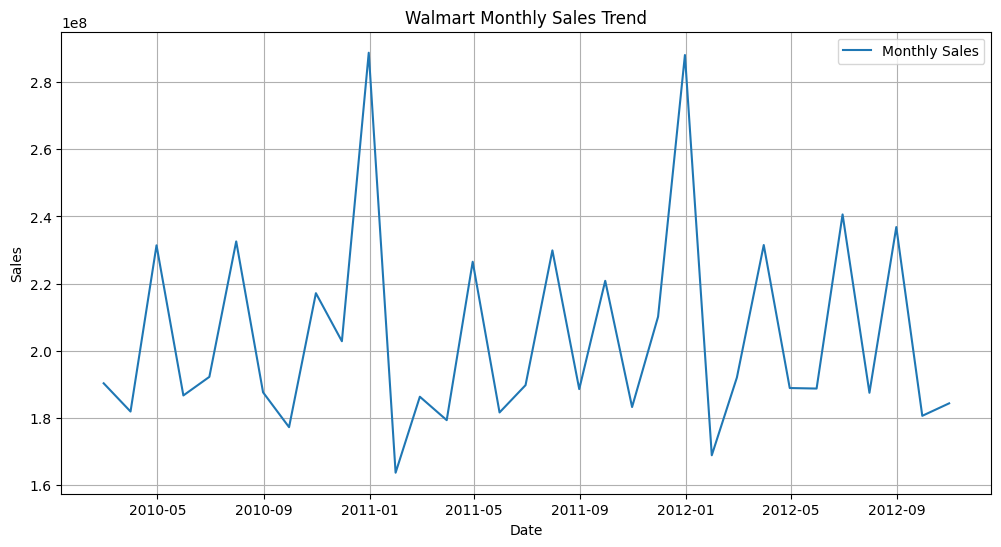

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label="Monthly Sales")
plt.title("Walmart Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


## 3-Month Moving Average

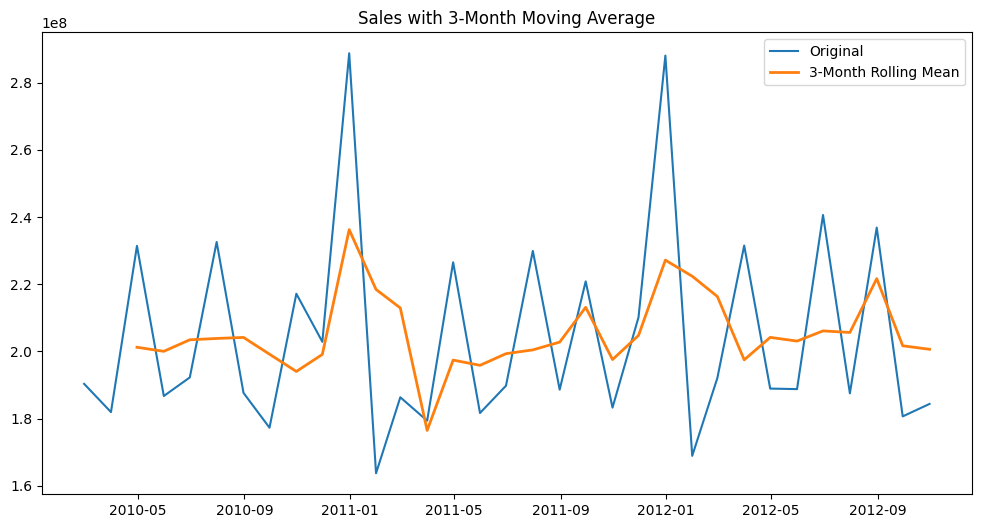

In [11]:
monthly_sales_rolling = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Original')
plt.plot(monthly_sales_rolling, label='3-Month Rolling Mean', linewidth=2)
plt.title("Sales with 3-Month Moving Average")
plt.legend()
plt.show()


##  Sales Breakdown by Store

/tmp/ipykernel_36/2265786695.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales = df.groupby(['Store', pd.Grouper(key='Date', freq='M')])['Weekly_Sales'].sum().reset_index()


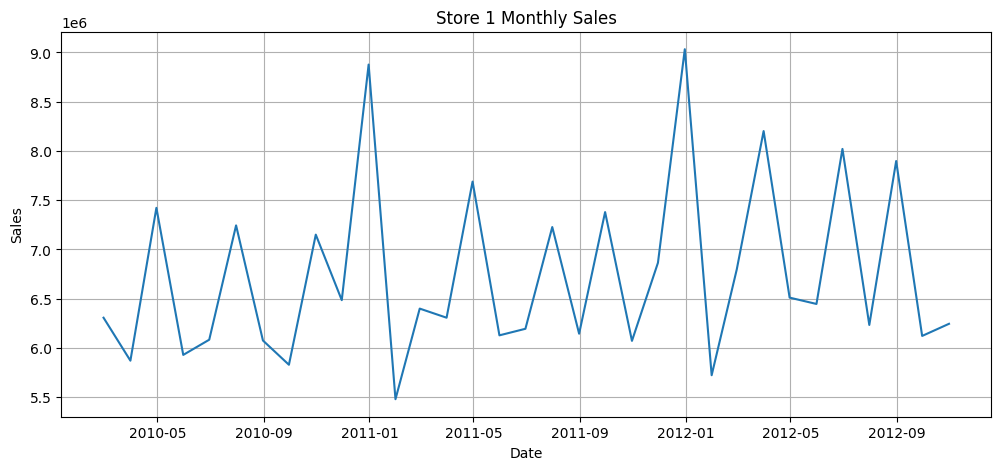

In [12]:
store_sales = df.groupby(['Store', pd.Grouper(key='Date', freq='M')])['Weekly_Sales'].sum().reset_index()

# Plot for Store 1
store1 = store_sales[store_sales['Store'] == 1]

plt.figure(figsize=(12,5))
plt.plot(store1['Date'], store1['Weekly_Sales'])
plt.title("Store 1 Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


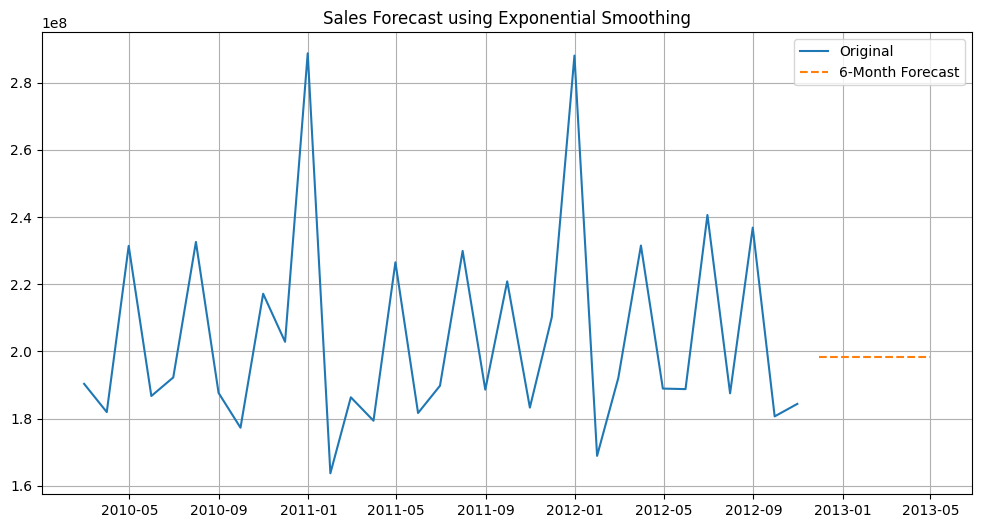

In [13]:
model = SimpleExpSmoothing(monthly_sales.dropna()).fit(smoothing_level=0.3, optimized=False)
forecast = model.forecast(6)

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Original')
plt.plot(forecast, label='6-Month Forecast', linestyle='--')
plt.title("Sales Forecast using Exponential Smoothing")
plt.legend()
plt.grid(True)
plt.show()
